In [1]:
import numpy as np
import pandas as pd
from GMM.GMM import *
from GMM import plot

In [2]:
mark = pd.read_csv('./ml_ds_mark.csv', sep=',', encoding='utf-8')
print("Kích thước bộ dữ liệu:", mark.shape)
mark

Kích thước bộ dữ liệu: (25, 3)


,Thang điểm (1-10),Số lượng,Môn
0,2.5-3.0,2,ML & DM
1,3.0-3.5,2,ML & DM
2,3.5-4.0,8,ML & DM
3,4.0-4.5,14,ML & DM
4,4.5-5.0,22,ML & DM
5,5.0-5.5,19,ML & DM
6,5.5-6.0,23,ML & DM
7,6.0-6.5,25,ML & DM
8,6.5-7.0,15,ML & DM
9,7.0-7.5,10,ML & DM


In [3]:
mark.iloc[:, -1].unique()

array(['ML & DM', 'Data Science'], dtype=object)

In [4]:
ml_df = mark[mark.iloc[:, -1] == 'ML & DM']
ds_df = mark[mark.iloc[:, -1] == 'Data Science']

In [5]:
def convert_scale_2_num(scale):
    a = float(scale.split("-")[0])
    b = float(scale.split("-")[1])
    return (a + b) / 2

In [6]:
mark_range_1 = ml_df.iloc[:, 0].apply(convert_scale_2_num).to_numpy()
mark_freq_1 = ml_df.iloc[:, 1].to_numpy()

In [7]:
mark_range_2 = ds_df.iloc[:, 0].apply(convert_scale_2_num).to_numpy()
mark_freq_2 = ds_df.iloc[:, 1].to_numpy()

In [8]:
def mark_list(mark_range, mark_freq):
    res = []
    for i in range(len(mark_range)):
        res = res + [mark_range[i]] * mark_freq[i]

    return np.array(res) 

In [9]:
mark_1 = mark_list(mark_range_1, mark_freq_1)
mark_2 = mark_list(mark_range_2, mark_freq_2)
mark_all = np.concatenate((mark_1, mark_2))

In [18]:
def markClassification(k=2):
    x = np.array(mark_all).reshape((len(mark_all), 1))
    col_name="mark"
    legend = ["ML & DM", "Data Science", "All", "Distribution"]
    gmm = GMM(x, k)
    gmm.fit()
    plot.plot_1D(gmm, x, legend, col_name)

Loop 1: Log-likelihood value: -591.560210829191
Loop 2: Log-likelihood value: -590.536225772416
Loop 3: Log-likelihood value: -590.5155171235701
Loop 4: Log-likelihood value: -590.5060049500063
Loop 5: Log-likelihood value: -590.5014769355575
Loop 6: Log-likelihood value: -590.4991682758723
Loop 7: Log-likelihood value: -590.4978424928139
Loop 8: Log-likelihood value: -590.4969454123044
Loop 9: Log-likelihood value: -590.4962281491827
Loop 10: Log-likelihood value: -590.4955785498954
Loop 11: Log-likelihood value: -590.4949456973295
Loop 12: Log-likelihood value: -590.4943060681377
Loop 13: Log-likelihood value: -590.4936483575447
Loop 14: Log-likelihood value: -590.492966674375
Loop 15: Log-likelihood value: -590.4922574888132
Loop 16: Log-likelihood value: -590.491518261599
Loop 17: Log-likelihood value: -590.4907468258597
Loop 18: Log-likelihood value: -590.4899411051128
Loop 19: Log-likelihood value: -590.4890989809544
Loop 20: Log-likelihood value: -590.4882182269235
Loop 21: Log-

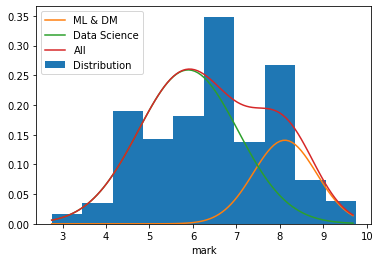

In [19]:
markClassification()